In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

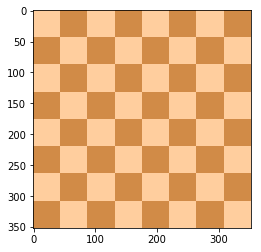

In [4]:
plt.imshow(flat_chess)

In [6]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

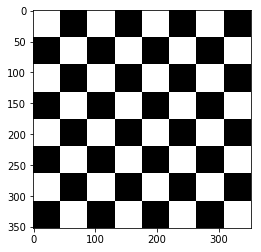

In [7]:
plt.imshow(gray_flat_chess, cmap='gray')

In [12]:
real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

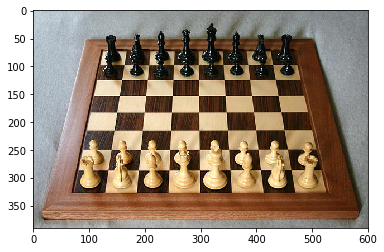

In [13]:
plt.imshow(real_chess)

In [14]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

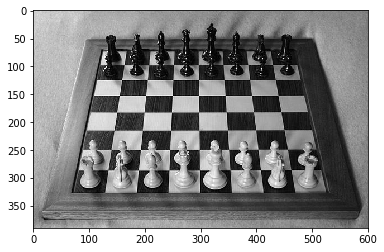

In [17]:
plt.imshow(gray_real_chess, cmap='gray')

In [21]:
gray = np.float32(gray_flat_chess)

In [22]:
# Harris Corner Detection Algorithm
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [23]:
# Needed to show the results
dst = cv2.dilate(dst, None)

In [24]:
# Whenever our HCA is greater than 10 % of our max value, set it to red (for visualization)
flat_chess[dst>0.01 * dst.max()] = [255,0,0] #RGB

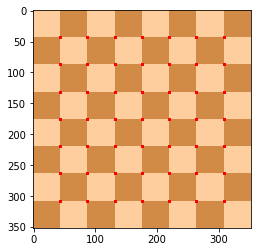

In [25]:
# Can't detect on edge because there is nothing on the edge to see to
plt.imshow(flat_chess)

In [26]:
gray = np.float32(gray_real_chess)

dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [27]:
dst = cv2.dilate(dst, None)

In [28]:
real_chess[dst>0.01 * dst.max()] = [255,0,0] #RGB

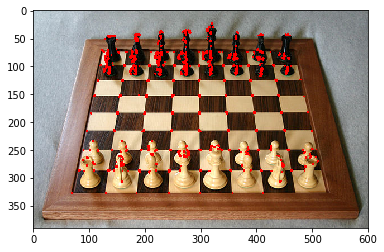

In [29]:
# Harris corner detection did not detect the edges of the board and detected a lot more on the black pieces
plt.imshow(real_chess)

In [30]:
# Shi-Tomasi Corner Detection Algorithm

In [32]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

In [38]:
# 5 - how many corners to detect
# downside to this method is that it doesn't automatically mark corners
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 64, 0.01, 10)

In [39]:
corners = np.int0(corners)

In [40]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess, (x,y), 3, (255,0,0), -1)

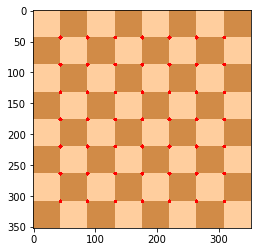

In [41]:
plt.imshow(flat_chess)

In [48]:
corners = cv2.goodFeaturesToTrack(gray_real_chess, 100, 0.01, 10)

In [49]:
corners = np.int0(corners)

In [50]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess, (x,y), 3, (255,0,0), -1)

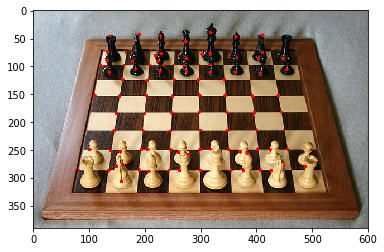

In [51]:
plt.imshow(real_chess)